In [3]:
# Importing the necessary packages for the program to run 
import numpy as np 
from astropy.table import Table
from astropy.io import ascii
import matplotlib.pyplot as plt
import time 

In [2]:
gal_data = np.genfromtxt('galaxies_data.csv', names=True, delimiter=',') # I import the freshly downloaded data from 
# the sql query on SDSS SkyServer to be manipulated later on 
print(gal_data)

[(18.64817, 17.41864, 16.94412, 16.58792, 16.39239, 0.05111748, 1.24e+18, 3.92e+17, nan)
 (20.23271, 18.17684, 17.10938, 16.64266, 16.2581 , 0.110159  , 1.24e+18, 3.92e+17, nan)
 (23.45753, 19.58114, 18.01423, 17.38922, 17.03886, 0.2846294 , 1.24e+18, 3.92e+17, nan)
 ...
 (25.5869 , 22.68267, 20.88023, 19.72527, 19.15104, 0.6045263 , 1.24e+18, 4.27e+18, nan)
 (25.76973, 23.86504, 21.94216, 20.83464, 19.98038, 0.604469  , 1.24e+18, 8.31e+18, nan)
 (23.82215, 23.75406, 21.67659, 20.75041, 20.02072, 0.6043065 , 1.24e+18, 8.22e+18, nan)]


In [3]:
data = Table(gal_data) # I convert the data into an Astropy table 
print(data)

   u        g        r        i        z      redshift   objid   specobjid class
-------- -------- -------- -------- -------- ---------- -------- --------- -----
18.64817 17.41864 16.94412 16.58792 16.39239 0.05111748 1.24e+18  3.92e+17   nan
20.23271 18.17684 17.10938 16.64266  16.2581   0.110159 1.24e+18  3.92e+17   nan
23.45753 19.58114 18.01423 17.38922 17.03886  0.2846294 1.24e+18  3.92e+17   nan
21.05175 19.09575  17.9891  17.5036 17.14912  0.1645858 1.24e+18  3.92e+17   nan
20.78709 18.60313  17.4926 17.06006 16.60692  0.1185153 1.24e+18  3.92e+17   nan
 21.0195 18.79093  17.6685  17.1755 16.84888  0.1089151 1.24e+18  3.92e+17   nan
19.44665 18.37631 17.86821 17.46901 17.20613 0.08857036 1.24e+18  3.92e+17   nan
19.93836 17.83698 16.73502 16.25718 15.85421  0.1141032 1.24e+18  3.92e+17   nan
 19.9371  18.3611 17.33887 16.85494 16.55845  0.1785775 1.24e+18  3.92e+17   nan
22.05212 21.06207 20.19822 19.03743 18.83564  0.6739925 1.24e+18  4.59e+18   nan
     ...      ...      ...  

In [4]:
mod_data = Table() # creating a new table that will hold the subtracted colour indices

In [5]:
mod_data['u-g'] = (data['u'] - data['g'])
mod_data['g-r'] = (data['g'] - data['r'])
mod_data['r-i'] = (data['r'] - data['i'])
mod_data['i-z'] = (data['i'] - data['z'])
mod_data['redshift'] = (data['redshift']) # this is the measured, spectroscopic redshift that will become the targets I 
# will train my model with 

In [6]:
mod_data

u-g,g-r,r-i,i-z,redshift
float64,float64,float64,float64,float64
1.2295300000000005,0.4745199999999983,0.3562000000000012,0.19553000000000154,0.05111748
2.0558700000000023,1.067459999999997,0.46672000000000224,0.38456000000000046,0.110159
3.876389999999997,1.56691,0.6250099999999996,0.350360000000002,0.2846294
1.9559999999999995,1.1066499999999984,0.4855000000000018,0.3544799999999988,0.1645858
2.183959999999999,1.1105300000000007,0.4325399999999995,0.4531400000000012,0.1185153
2.2285700000000013,1.1224299999999978,0.4930000000000021,0.32661999999999836,0.1089151
1.0703400000000016,0.5080999999999989,0.39920000000000044,0.2628799999999991,0.08857036
2.101379999999999,1.1019600000000018,0.47783999999999693,0.4029700000000016,0.1141032
1.5760000000000005,1.0222300000000004,0.48393000000000086,0.2964899999999986,0.1785775


In [7]:
mod_data.write('features_and_targets_data.csv', overwrite=True, format='ascii.csv')

In [4]:
new_gal_data = np.loadtxt('features_and_targets_data.csv', delimiter=',', skiprows=1)
print(new_gal_data)

[[1.22953    0.47452    0.3562     0.19553    0.05111748]
 [2.05587    1.06746    0.46672    0.38456    0.110159  ]
 [3.87639    1.56691    0.62501    0.35036    0.2846294 ]
 ...
 [2.90423    1.80244    1.15496    0.57423    0.6045263 ]
 [1.90469    1.92288    1.10752    0.85426    0.604469  ]
 [0.06809    2.07747    0.92618    0.72969    0.6043065 ]]


In [5]:
class Node():
    
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        # for decision node 
        self.feature_index = feature_index
        self.threshold = threshold 
        self.left = left 
        self.right = right 
        self.var_red = var_red 
        
        # for leaf node 
        self.value = value 

In [7]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=3, max_depth=3):
        self.root=None
        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    
    def build_tree(self, dataset, current_depth=0):
        X = dataset[:,:-1]
        Y = dataset[:,-1]
        num_samples, num_features = np.shape(X)
        # !! using a dictionary to hold the key, 'feature_index' and its corresponding value, 'threshold' 
        # so that the key can be looped through 
        best_split = {} 
        if num_samples >= self.min_samples_split and current_depth<=self.max_depth:
            # calling the 'get_best_split' function
            best_split = self.get_best_split(dataset, num_samples, num_features)  
            # check if variance reduction is positive
            if best_split["var_red"] > 0:
                # recur left and right 
                left_subtree = self.build_tree(best_split["data_left"], current_depth+1)
                right_subtree = self.build_tree(best_split["data_right"], current_depth+1)
                
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, 
                            right_subtree, best_split["var_red"])
        
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    

    
    def variance_reduction(self, parent, left_child, right_child):
        n_left = len(left_child)
        n_right = len(right_child)
        mean_left = sum(left_child) / n_left
        mean_right = sum(right_child) / n_right 
        deviation_left = [(m - mean_left) ** 2 for m in left_child]
        deviation_right = [(o - mean_right) ** 2 for o in right_child]
        
        var_left_child = sum(deviation_left) / n_left
        var_right_child = sum(deviation_right) / n_right
        
        n_parent = len(parent)
        mean_parent = sum(parent) / n_parent
        deviation_parent = [(p - mean_parent) ** 2 for p in parent]
        var_parent = sum(deviation_parent) / n_parent 
        
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        
        reduction = var_parent - ((weight_left * var_left_child) + (weight_right * var_right_child)) 
        return reduction 
    
    
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_var_red = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            
            # find the unique items in feature values 
            feature_list = []
            for item in feature_values:
                if item not in feature_list:
                    feature_list.append(item)         
            possible_thresholds = feature_list 
            
            # loop over all feature values present in the data
            for threshold in possible_thresholds:
                # find current split
                data_left, data_right = self.split(dataset, feature_index, threshold)
                
                # check if child nodes are not null
                if len(data_left) > 0 and len(data_right) > 0:
                    y = dataset[:, -1]
                    left_y = data_left[:, -1]
                    right_y = data_right[:, -1]
                    current_var_red = self.variance_reduction(y, left_y, right_y)
                    
                    # update best split if needed 
                    if current_var_red > max_var_red: 
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["data_left"] = data_left
                        best_split["data_right"] = data_right
                        best_split["var_red"] = current_var_red
                        max_var_red = current_var_red
        
        return best_split 
    
    
    
    def split(self, dataset, feature_index, threshold):
        # split the data in the tree for left or right nodes 
        data_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        data_right = np.array([row for row in dataset if row[feature_index]>=threshold])
        return data_left, data_right
    
    
    def calculate_leaf_value(self, Y):
        leaf_value = sum(Y) / len(Y) # leaf value = mean of the targets at that node 
        return leaf_value
        
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value != None: #checking if the leaf node is not null so that the tree can be recursively built 
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "var_red=", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
            
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1) #concatenate arrays along x-axis - X is a 2D array, and Y is 1D array 
        self.root = self.build_tree(dataset)
        
    
    def make_prediction(self, x, tree): # make a prediction for a single data point
        if tree.value != None:
            return tree.value
        
        feature_value = x[tree.feature_index]
        if feature_value<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    
    def predict(self, X): # make prediction for the whole (sub)set 
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    

In [8]:
data_arr = np.array(new_gal_data)
features = data_arr[:100,:-1] #X - subset of n galaxies*
targets = data_arr[:100,-1].reshape(-1,1) #Y 
# *to print out the tree, I used a subset of n galaxies (>=100) because it is the most 
# efficient way to train and validate the model

data_split = 2*features.shape[0]//3
X_train, X_test = features[:data_split], features[data_split:]
Y_train, Y_test = targets[:data_split], targets[data_split:]

In [9]:
start = time.time() # I will time how long it takes to train the decision tree as the size of the subset changes 

dtr = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
dtr.fit(X_train, Y_train)
        
time.sleep(3)
end = time.time()
elapsed_time = end - start
print('Execution time:', elapsed_time, 'seconds')

Execution time: 3.1400349140167236 seconds


In [10]:
dtr.print_tree()

X_2 <= 0.7238499999999988 var_red= 0.030557185323516825
 left:X_1 <= 1.4968400000000024 var_red= 0.008643313295903182
  left:X_1 <= 1.010200000000001 var_red= 0.000930318648129077
    left:X_1 <= 0.8405299999999976 var_red= 0.00013836726588294123
        left:0.09564171615384616
        right:0.07116591222222221
    right:X_1 <= 1.2352999999999987 var_red= 0.0006989810691996281
        left:0.13254752076923076
        right:0.1930264
  right:X_1 <= 1.821620000000003 var_red= 0.0008864648478385689
    left:X_1 <= 1.56691 var_red= 0.0006026076487341096
        left:0.25467426666666665
        right:0.3056647142857143
    right:X_3 <= 0.4215699999999991 var_red= 0.00017144552225693875
        left:0.3389222
        right:0.36396684999999995
 right:X_2 <= 1.0167300000000026 var_red= 0.0037995155894254362
  left:X_2 <= 0.7917999999999985 var_red= 0.0013535597913689997
    left:0.41890115
    right:X_0 <= 1.4004799999999982 var_red= 0.00029013921691583373
        left:0.5023220666666667
    

In [11]:
pred = dtr.predict(X_test)
print(pred[:10])

[0.59851417, 0.68787355, 0.36396684999999995, 0.4709137, 0.4709137, 0.09564171615384616, 0.4709137, 0.3056647142857143, 0.5340597, 0.4709137]


In [12]:
diff = np.abs(Y_test - pred) # this algorithm does not work - the next cell has the working algorithm 
len_diff = len(diff)
diff.sort()

if len_diff % 2 == 0:
	med1 = diff[len_diff//2]
	med2 = diff[len_diff//2 - 1]
	med_diff = (med1 + med2)/2
else:
	med_diff = diff[len_diff//2]
print(str(med_diff))

[0.02911867 0.02911867 0.03790934 0.03790934 0.03790934 0.03790934
 0.03790934 0.04653931 0.04653931 0.05851184 0.06316805 0.07050764
 0.1046201  0.1046201  0.19316649 0.19316649 0.20979523 0.20979523
 0.22231756 0.23519687 0.2886703  0.31890974 0.31890974 0.31890974
 0.31890974 0.33617486 0.36893564 0.36893564 0.40116288 0.40116288
 0.40116288 0.40116288 0.40116288 0.45808047]


In [13]:
diff = abs(Y_test - pred)
median_diff = np.median(diff)
print("The median difference is " + str(median_diff))

The median difference is 0.22599117923076922


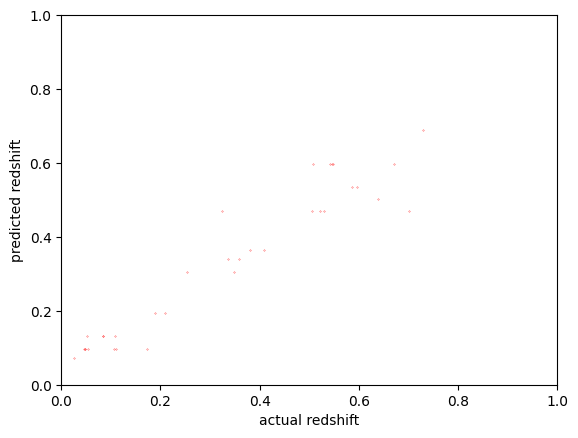

In [14]:
#creating a plot of the predicted redshifts against the actual redshifts
plt.scatter(Y_test, pred, color="red", marker='o',  s=0.05)
plt.xlabel('actual redshift')
plt.ylabel('predicted redshift')

plt.xlim(0, 1.0)
plt.ylim(0, 1.0)

plt.show()